In [1]:
import numpy as np
import networkx as nwx
import matplotlib as mp
import pandas as pd
import statistics as st
pd.pandas.set_option('display.max_columns', None)
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats.mstats import zscore
import scipy.stats as st

from sklearn.metrics import median_absolute_error, r2_score

import os
import json
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as sp_stats
import matplotlib.pyplot as plt
sns.set(style="white", font_scale=1.2)

import sklearn.metrics as skm
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
import statistics as st

/Users/hypernome/miniconda3/envs/ds_project/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
data_time_of_day = pd.read_excel("../data/raw_data2.xlsx",sheet_name="Fig 2",usecols='A, B')

In [3]:
data_time_of_day

,Time of day (hour),Alertness
0,8,53
1,9,54
2,10,58
3,9,64
4,9,31
...,...,...
89530,17,79
89531,18,86
89532,19,84
89533,20,80


In [4]:

fig1_dict = dict()
for index, row in data_time_of_day.iterrows():
    time=row['Time of day (hour)']
    alert=row['Alertness']
    if fig1_dict.get(time) is not None:
        fig1_dict[time].append(alert)
    else:
        fig1_dict[time]=[]


avg = dict()
std = dict()
for index in fig1_dict.keys():
    if len(fig1_dict[index])>1:
        avg[index]=st.mean(fig1_dict[index])
        std[index]=st.stdev(fig1_dict[index])

[8, 9, 10, 11, 13, 14, 15, 18, 20, 12, 16, 17, 21, 7, 19, 23, 22, 6, 5, 2, 4, 3]


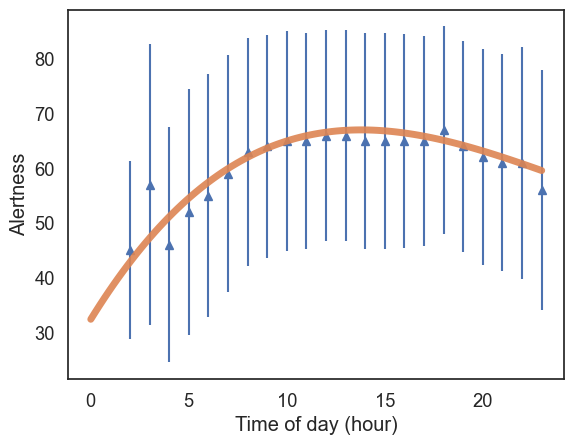

In [5]:
x = []

y = []
z =[]
fig, ax = plt.subplots(1, 1, dpi=100)
for i in fig1_dict.keys():
    if len(fig1_dict[i])>1:
        x.append(i)
        y.append(avg[i])
        z.append(std[i])

y = np.array(y)
z = np.array(z)

print(x)

plt.errorbar(x, y, z, linestyle='None', marker='^')
sns.regplot(data=data_time_of_day[data_time_of_day['Time of day (hour)'].between(0, 23)],
            x="Time of day (hour)", y="Alertness", order=3, 
            ci=None, line_kws=dict(lw=5, zorder=20, alpha=0.9), scatter=False, ax=ax)

plt.show()

In [6]:
polar_data = pd.read_excel("../data/raw_data2.xlsx",sheet_name="Fig 2",usecols='A,B, D')


In [7]:
polar_data

,Time of day (hour),Alertness,Alertness rating: time of day (radians)
0,8,53,2.129302
1,9,54,2.587451
2,10,58,2.779437
3,9,64,2.382374
4,9,31,2.556907
...,...,...,...
89530,17,79,4.638212
89531,18,86,4.917465
89532,19,84,5.100725
89533,20,80,5.449791


/Users/hypernome/miniconda3/envs/ds_project/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


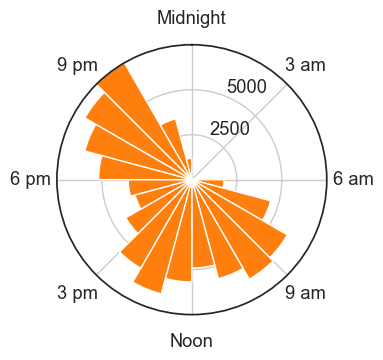

In [10]:

polar_data['al_hour_of_day_rad'] = pg.convert_angles(polar_data['Time of day (hour)'], low=0, high=24, positive=True)
bins = pg.convert_angles(np.arange(0, 24 + 1), low=0, high=24, positive=True)

g = sns.FacetGrid(polar_data, subplot_kws=dict(projection='polar'), height=4, despine=False)
g.map(sns.distplot, "Alertness rating: time of day (radians)", kde=False, bins=bins, color="tab:orange", hist_kws={'alpha': 1})

plt.yticks([2500, 5000])
plt.ylim([0, 7500])

plt.xlabel("")
plt.ylabel("")
pi4 = np.pi / 4

plt.xticks([0, pi4, 2 * pi4, 3 * pi4, 4 * pi4, 5 * pi4, 6 * pi4, 7 * pi4],
           ["Midnight", "3 am", "6 am", "9 am", "Noon", "3 pm", "6 pm", "9 pm"])

ax = plt.gca()
ax.xaxis.set_tick_params(pad=6)

ax.set_theta_zero_location("N")  
ax.set_theta_direction(-1)  

plt.tight_layout()
plt.savefig("../plot_new/f30.png", dpi=600, bbox_inches="tight")

/var/folders/45/w5glyv3j3kb3yvsmvk3h71k00000gn/T/ipykernel_7363/4007858694.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


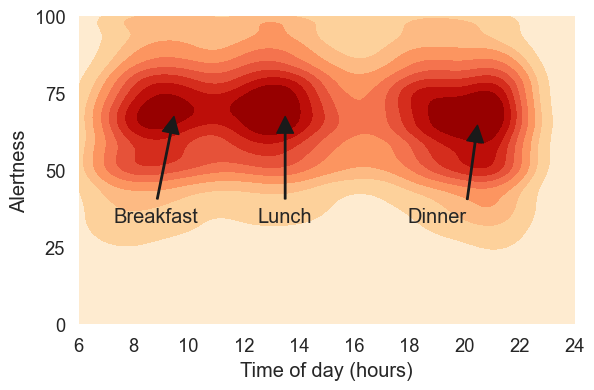

In [11]:
fig, ax = plt.subplots(figsize=(6.4, 4), dpi=100)

sns.kdeplot(
    x=data_time_of_day["Time of day (hour)"], y=data_time_of_day["Alertness"], 
    shade=True, cmap="OrRd", thresh=0, alpha=1, cbar=False, ax=ax)  

plt.ylabel("Alertness")

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])
plt.xlabel("Time of day (hours)")
xticks = np.arange(6, 26, 2)
plt.xticks(xticks, xticks)
plt.xlim(6, 24)

ax.annotate(
     "Breakfast", xy=(9.5, 69), xycoords='data',
     xytext=(8.8, 35), textcoords='data', ha='center', va='center',
     arrowprops=dict(fc='k', ec='k',shrink=0.05, width=1, connectionstyle="arc3,rad=0"),
)

ax.annotate(
     "Lunch", xy=(13.5, 69), xycoords='data',
     xytext=(13.5, 35), textcoords='data', ha='center', va='center',
     arrowprops=dict(fc='k', ec='k',shrink=0.05, width=1, connectionstyle="arc3,rad=0"),
)

ax.annotate(
     "Dinner", xy=(20.5, 66), xycoords='data',
     xytext=(19, 35), textcoords='data', ha='center', va='center',
     arrowprops=dict(fc='k', ec='k',shrink=0.05, width=1, connectionstyle="arc3,rad=0"),
)

sns.despine(bottom=True, left=True)
plt.savefig("../plot_new/f31.png", dpi=600, bbox_inches="tight")
plt.show()

In [12]:
data = pd.read_excel("../data/raw_data2.xlsx",sheet_name="Fig3",usecols='A, B, C, D, E, F, G, H, I , J,K')

In [14]:
data.head(10)

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_type_breakfast,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,MCB,0.777249,-0.209444
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,OGTT,1.012362,1.586944
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,High Fibre,0.774941,0.625833
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,MCB,0.864187,2.024722
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,High Carb,1.248574,2.816667
5,36.000000,-0.018113,-1.486706,-0.375000,1.597297,2.334722,53.439148,9.668056,High Carb,1.082996,3.192500
6,77.000000,-0.113107,-2.010317,-1.775000,3.745104,0.168056,48.464469,10.001389,UK Average,0.795114,3.962500
7,26.500000,0.039059,-0.579762,-1.608333,3.927720,0.001389,56.890316,8.334722,OGTT,0.837099,1.603889
8,55.666667,-0.031825,1.061905,0.641667,4.060555,0.001389,45.678480,6.834722,OGTT,0.935896,0.071667
9,73.750000,-0.021419,-0.729762,-0.491667,1.971015,0.501389,54.834432,9.168056,UK Average,0.803545,0.701389


In [15]:
alert = []
sleepEff = []
L5Value = []
L5Onset=[]
HC = []
HC_a=[]
HP=[]
HP_a=[]
HFat=[]
HFat_a=[]
HF_a=[]
HF=[]
MCB_a=[]
MCB=[]
OGTT_a=[]
OGTT=[]


for index, row in data.iterrows():
    alertness=row['Morning Alertness']
    alert.append(alertness)
    sleepEff.append(row['sleepoffset_hr_pcen'])
    key = row['meal_type_breakfast']
    val = row['meal_log_iauc_breakfast']
    if key == 'MCB':
        MCB_a.append(alertness)
        MCB.append(val)
    elif key == 'OGTT':
        OGTT_a.append(alertness)
        OGTT.append(val)
    elif key == 'High Fibre':
        HF_a.append(alertness)
        HF.append(val)
    elif key == 'High Fat':
        HFat_a.append(alertness)
        HFat.append(alertness)
    elif key == 'High Carb':
        HC_a.append(alertness)
        HC.append(val)
    elif key =='High Protein':
        HP_a.append(alertness)
        HP.append(val)
        



print('The Beta Coeff is: %f' % val)


The Beta Coeff is: 1.216745


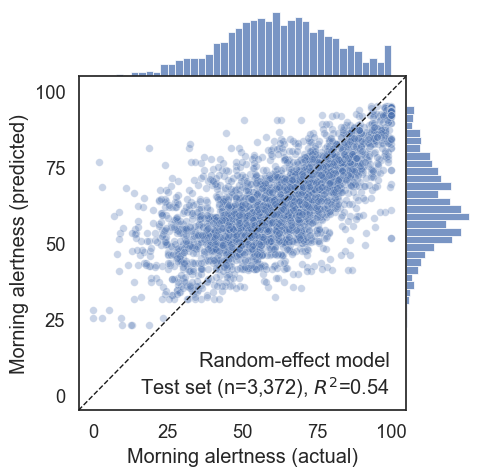

In [18]:
'''Morning alertness actual VS perdiction.'''

import pingouin as pg
import scipy.stats as sp_stats
data = pd.read_excel("../data/raw_data2.xlsx",sheet_name="Fig 4",usecols='C, D, E')
data.dropna(inplace=True)

import math
g = sns.jointplot(x="Morning Alertness (true)", y="Morning Alertness (predictions from naive model)", kind="scatter", 
                  data=data, height=5, space=0,
                  joint_kws=dict(alpha=0.3, s=30),
                  marginal_kws=dict( bins=np.linspace(0, 100, 41)))

ax = g.ax_joint
ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])


r2 = r2_score(data['Morning Alertness (true)'], data['Morning Alertness (predictions from naive model)'])
mae = median_absolute_error(data['Morning Alertness (true)'], data['Morning Alertness (predictions from naive model)'])
text = f"Random-effect model\nTest set (n={data.shape[0]:,}), $R^2$=0.54"   
ax.annotate(text, xy=(0.95, 0.05), xycoords="axes fraction", ha="right", fontstyle="normal")

ax.axline((1, 1), slope=1, color="k", ls='--', lw=1, zorder=10)

ax.set_xlabel("Morning alertness (actual)")
ax.set_ylabel("Morning alertness (predicted)");
plt.savefig("../plot_new/f32.png", dpi=600, bbox_inches="tight")
plt.show()



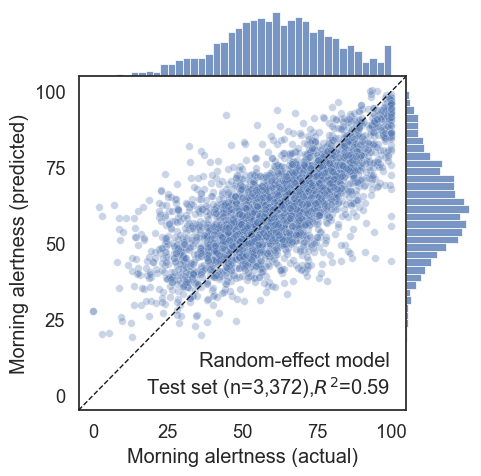

In [19]:

'''This is the figure for the perdicted trait alertness with mixed linear model vs the actual alertness'''

g = sns.jointplot(x="Morning Alertness (true)", y="Morning Alertness (predictions from full model)", kind="scatter", 
                  data=data, height=5, space=0,
                  joint_kws=dict(alpha=0.3, s=30),
                  marginal_kws=dict( bins=np.linspace(0, 100, 41)))

ax = g.ax_joint
ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])

r2 = r2_score(data['Morning Alertness (true)'], data['Morning Alertness (predictions from full model)'])
mae = median_absolute_error(data['Morning Alertness (true)'], data['Morning Alertness (predictions from full model)'])
text = f"Random-effect model\nTest set (n={data.shape[0]:,}),$R^2$=0.59"  
ax.annotate(text, xy=(0.95, 0.05), xycoords="axes fraction", ha="right", fontstyle="normal")

ax.axline((1, 1), slope=1, color="k", ls='--', lw=1, zorder=10)

ax.set_xlabel("Morning alertness (actual)")
ax.set_ylabel("Morning alertness (predicted)");
plt.savefig("../plot_new/f33.png", dpi=600, bbox_inches="tight")
plt.show()

In [21]:
df = pd.read_excel("../data/raw_data2.xlsx",sheet_name="Fig 5")

In [22]:
# Check dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trait Alertness (true)     833 non-null    float64
 1   Predicted Trait Alertness  833 non-null    float64
 2   Unnamed: 2                 0 non-null      float64
 3   Age                        833 non-null    float64
 4   Sex                        833 non-null    int64  
 5   Education                  833 non-null    float64
 6   Smoking status             833 non-null    float64
 7   BMI                        833 non-null    float64
 8   Sleep duration             833 non-null    float64
 9   Sleep efficiency           833 non-null    float64
 10  Sleep onset                833 non-null    float64
 11  Sleep offset               833 non-null    float64
 12  Social jetlag              833 non-null    float64
 13  PSQI                       833 non-null    float64

In [23]:
feat = {
    'Demographics': ['Age', 'Sex'],
    'Physiology': ['BMI'],
    'Mood': ['Happiness'] + ['Anxiety disorder', 'Depression'],
    'Eating behavior': ['Skip breakfast', 'Coffee consumption', 'Alcohol consumption', 'Eating frequency', 'Snacker'], 
    'Physical activity': ['L5 value',  'L5 clock time', 'M10 value', 'M10 clock time', 'Self-report exercise'],
}

pred = np.array(sum(list(feat.values()), []))

print(len(pred), 'predictors')
pred_cont = pred[df[pred].nunique() > 5].tolist()
print(f"There are {len(pred_cont)} continuous predictors")
corr_alert = df.pairwise_corr(columns=[['Trait Alertness (true)'], pred_cont], padjust="holm", method="pearson")
corr_alert = corr_alert.sort_values('p-unc').set_index(['Y'])[['n', 'r', 'p-corr']]  # 'p-unc'
corr_alert.round(4)

16 predictors
There are 14 continuous predictors


,n,r,p-corr
Y,,,
Happiness,833,0.6720,0.0000
Age,833,0.4322,0.0000
M10 clock time,833,0.3017,0.0000
BMI,833,0.2529,0.0000
M10 value,833,0.2257,0.0000
Depression,833,0.2123,0.0000
Eating frequency,833,0.2110,0.0000
L5 value,833,0.2090,0.0000
Self-report exercise,833,0.2025,0.0000


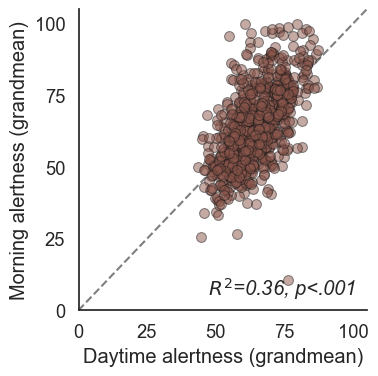

In [25]:
'''Correlation between morning alertness and alertness.'''
import pingouin as pg

sns.lmplot(x='Predicted Trait Alertness', y='Trait Alertness (true)', data=df, height=4,
           aspect=1, facet_kws=dict(legend_out=False), ci=None, fit_reg=False,
           truncate=False, 
           scatter_kws={'alpha': 0.5, "s": 50, "ec": "k", "lw": 0.75, "color": "tab:brown"})

plt.xlim(0, 105)
plt.ylim(0, 105)
plt.xticks([0, 25, 50, 75, 100])
plt.yticks([0, 25, 50, 75, 100])

ax = plt.gca()

# Add correlation
corr = df.pairwise_corr(columns=['Trait Alertness (true)', 'Predicted Trait Alertness'])
r2 = corr.at[0, "r"] ** 2
pval = corr.at[0, "p-unc"]
text = f"$R^2$={r2:.2f}, p<.001"
ax.annotate(text, xy=(0.45, 0.05), xycoords="axes fraction", ha="left", fontstyle="italic")

ax.axline((1, 1), slope=1, color="tab:grey", ls='--', lw=1.5, zorder=0)

plt.xlabel("Daytime alertness (grandmean)")
plt.ylabel("Morning alertness (grandmean)")
plt.savefig("../plot_new/f34.png", dpi=600, bbox_inches="tight")

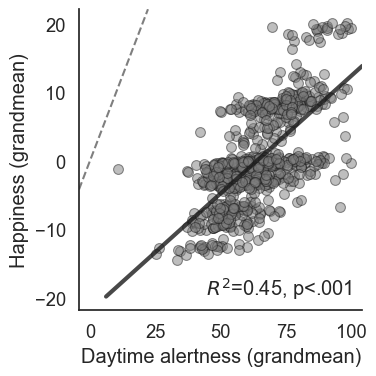

In [26]:
sns.lmplot(x='Trait Alertness (true)', y='Happiness', data=df, height=4,
           aspect=1, facet_kws=dict(legend_out=False), ci=None, fit_reg=True,
           truncate=False, 
           scatter_kws={'alpha': 0.5, "s": 50, "ec": "k", "lw": 0.75, "color": "tab:grey"},
           line_kws=dict(color="k", lw=3, alpha=0.8))



ax = plt.gca()

# Add unadjusted correlation
corr = df.pairwise_corr(columns=['Trait Alertness (true)', 'Happiness'])
r2 = corr.at[0, "r"] ** 2
pval = corr.at[0, "p-unc"]
text = f"$R^2$={r2:.2f}, p<.001"
ax.annotate(text, xy=(0.45, 0.05), xycoords="axes fraction", ha="left")

ax.axline((1, 1), slope=1, color="tab:grey", ls='--', lw=1.5, zorder=0)

plt.xlabel("Daytime alertness (grandmean)")
plt.ylabel("Happiness (grandmean)")
plt.tight_layout()
plt.savefig("../plot_new/f35.png", dpi=600, bbox_inches="tight")

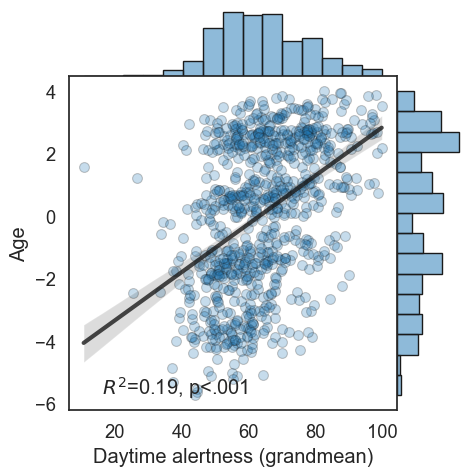

In [27]:
g = sns.jointplot(x='Trait Alertness (true)', y='Age', data=df, height=5, kind="reg", space=0,
              marginal_kws=dict(kde=False, color="tab:blue", bins=15, fill=True, alpha=0.5, lw=1, ec='k'),
           scatter_kws={'alpha': 0.25, "s": 50, "ec": "k", "lw": 0.75, "color": "tab:blue"},
           line_kws=dict(color="k", lw=3, alpha=0.8))

ax = g.ax_joint



# Add unadjusted correlation
corr = df.pairwise_corr(columns=['Trait Alertness (true)', 'Age'])
r2 = corr.at[0, "r"] ** 2
pval = corr.at[0, "p-unc"]
text = f"$R^2$={r2:.2f}, p<.001"
ax.annotate(text, xy=(0.1, 0.05), xycoords="axes fraction", ha="left")

ax.set_xlabel("Daytime alertness (grandmean)")
ax.set_ylabel("Age");
plt.savefig("../plot_new/f36.png", dpi=600, bbox_inches="tight")

# My Result

In [29]:
'''Morning alertness actual VS perdiction.'''

import pingouin as pg
import scipy.stats as sp_stats
import pandas as pd
data_new = pd.read_csv("../res/predicted_result.csv")


In [30]:
data_new 

,Unnamed: 0,y_test,y_predict
0,3599,72.666667,74.283230
1,1407,72.500000,58.807716
2,1550,46.000000,74.872574
3,3400,54.500000,58.214283
4,2345,17.000000,63.421253
...,...,...,...
1344,1225,48.800000,58.590330
1345,1487,76.666667,62.070970
1346,3541,47.000000,62.433628
1347,4162,70.666667,60.336770


In [31]:
data_new .drop('Unnamed: 0', axis=1, inplace=True)

In [32]:
data

,Morning Alertness (true),Morning Alertness (predictions from naive model),Morning Alertness (predictions from full model)
0,51.750000,49.837360,48.768984
1,59.000000,49.837360,56.170197
2,50.000000,61.774793,65.765850
3,36.000000,61.774793,66.253395
4,26.500000,61.774793,57.212963
...,...,...,...
3367,95.250000,85.000326,91.004565
3368,64.000000,68.614061,68.041944
3369,67.333333,68.614061,69.980612
3370,66.000000,68.614061,61.669039


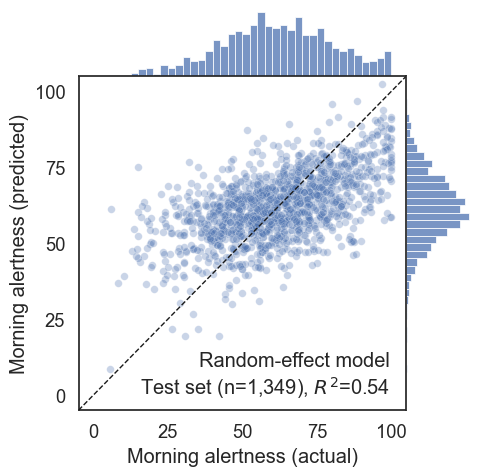

In [33]:
import math
g = sns.jointplot(x="y_test", y="y_predict", kind="scatter", 
                  data=data_new , height=5, space=0,
                  joint_kws=dict(alpha=0.3, s=30),
                  marginal_kws=dict( bins=np.linspace(0, 100, 41)))

ax = g.ax_joint
ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])


r2 = r2_score(data_new ['y_test'], data_new ['y_predict'])
mae = median_absolute_error(data_new ['y_predict'],data_new ['y_predict'])
text = f"Random-effect model\nTest set (n={data_new .shape[0]:,}), $R^2$=0.54"   
ax.annotate(text, xy=(0.95, 0.05), xycoords="axes fraction", ha="right", fontstyle="normal")

ax.axline((1, 1), slope=1, color="k", ls='--', lw=1, zorder=10)

ax.set_xlabel("Morning alertness (actual)")
ax.set_ylabel("Morning alertness (predicted)");
plt.savefig("../plot_new/f37.png", dpi=600, bbox_inches="tight")
plt.show()

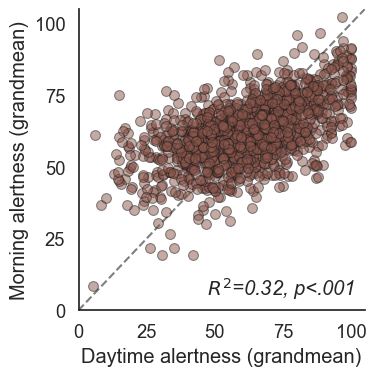

In [34]:
'''Correlation between morning alertness and alertness.'''
import pingouin as pg

sns.lmplot(x='y_test', y='y_predict', data=data_new , height=4,
           aspect=1, facet_kws=dict(legend_out=False), ci=None, fit_reg=False,
           truncate=False, 
           scatter_kws={'alpha': 0.5, "s": 50, "ec": "k", "lw": 0.75, "color": "tab:brown"})

plt.xlim(0, 105)
plt.ylim(0, 105)
plt.xticks([0, 25, 50, 75, 100])
plt.yticks([0, 25, 50, 75, 100])

ax = plt.gca()

# Add correlation
corr = data_new .pairwise_corr(columns=['y_test', 'y_predict'])
r2 = corr.at[0, "r"] ** 2
pval = corr.at[0, "p-unc"]
text = f"$R^2$={r2:.2f}, p<.001"
ax.annotate(text, xy=(0.45, 0.05), xycoords="axes fraction", ha="left", fontstyle="italic")

ax.axline((1, 1), slope=1, color="tab:grey", ls='--', lw=1.5, zorder=0)

plt.xlabel("Daytime alertness (grandmean)")
plt.ylabel("Morning alertness (grandmean)")
plt.savefig("../plot_new/f38.png", dpi=600, bbox_inches="tight")